In [168]:
from glob import glob
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [169]:
df = []
df = pd.read_csv("HAM10000_metadata.csv")
df = df.sort_values(by="image_id")

lesion_type_dict = {
    "nv": "Melanocytic nevi",
    "mel": "Melanoma",
    "bkl": "Benign keratosis-like lesions",
    "akiec": "Actinic keratoses",
    "vasc": "Vascular lesions",
    "df": "Dermatofibroma",
}
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest


In [172]:
image_dir = "HAM10000_images"
image_name = "ISIC_0024310.jpg"
image_path = os.path.join(image_dir, image_name)
Load_image = Image.open(image_path).convert("RGB")

nmpy_img = np.asarray(Load_image.resize((65, 45)))
print(nmpy_img.shape)
print(Load_image.show())

(45, 65, 3)


python(59304) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


None


python(59305) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [175]:
image_files = []
image_files = glob("HAM10000_images/*.jpg")
image_files = [("HAM10000_images/" + image_id + ".jpg") for image_id in df["image_id"]]
image_files = sorted(image_files)

In [176]:
current = df[df["image_id"] == image_files[0].split("/")[1][:-4]]
print(current)
print((current['dx'] == 'nv'))

        lesion_id      image_id  dx    dx_type   age   sex localization
4349  HAM_0000550  ISIC_0024306  nv  follow_up  45.0  male        trunk
4349    True
Name: dx, dtype: bool


In [177]:
df2 = pd.DataFrame(columns=["lesion_id", "image_id", "dx", "dx_type", "age", "sex", "localization"])
current = df[df["image_id"] == image_files[0].split("/")[1][:-4]]
df2 = df2.append(current, ignore_index=True)
# print(df2)

current = df[df["image_id"] == image_files[1].split("/")[1][:-4]]
df2 = df2.append(current, ignore_index=True)

/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/2116574882.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(current, ignore_index=True)
/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/2116574882.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(current, ignore_index=True)


In [178]:
df2 = pd.DataFrame(columns=["lesion_id", "image_id", "dx", "dx_type", "age", "sex", "localization"])

train_image = []
for i in range(0, len(image_files)):
    image = Image.open(image_files[i]).convert("RGB")
    image = image.resize((99, 99))
    nmpy_img = np.asarray(image)
    current = df[df['image_id']==image_files[i].split("/")[1][:-4]]
    train_image.append(nmpy_img)
    df2 = df2.append(current, ignore_index=True)
    if (current.values[0][2] != 'nv'):
        nmpy_img1 = np.rot90(nmpy_img)
        train_image.append(nmpy_img1)
        nmpy_img2 = np.rot90(nmpy_img1)
        train_image.append(np.asarray(nmpy_img2))
        nmpy_img3 = np.rot90(nmpy_img2)
        train_image.append(np.asarray(nmpy_img3))
        df2 = df2.append(current, ignore_index=True)
        df2 = df2.append(current, ignore_index=True)
        df2 = df2.append(current, ignore_index=True)

/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/3568183831.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(current, ignore_index=True)
/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/3568183831.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(current, ignore_index=True)
/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/3568183831.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(current, ignore_index=True)
/var/folders/5z/p2xz9vfj3tn8ygf6wlkq0x8m0000gn/T/ipykernel_33205/3568183831.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [182]:
image = Image.open(image_files[10000]).convert("RGB")
Load_image.resize((99, 99))
print(df2.shape)
print(np.shape(train_image))

(19945, 7)
(19945, 99, 99, 3)


Text(0, 0.5, 'Number of People')

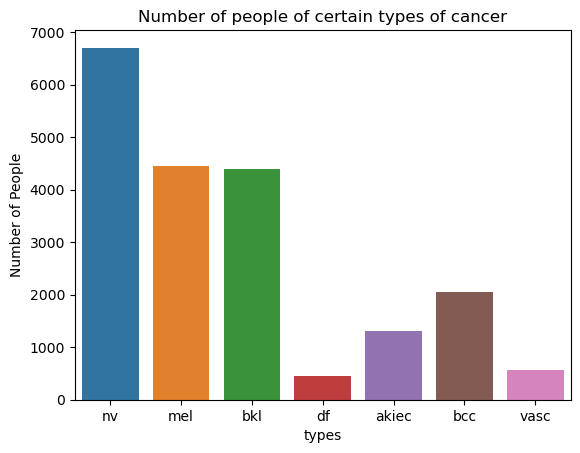

In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.countplot(data=df2, x="dx")
plt.title("Number of people of certain types of cancer")
plt.xlabel("types")
plt.ylabel("Number of People")

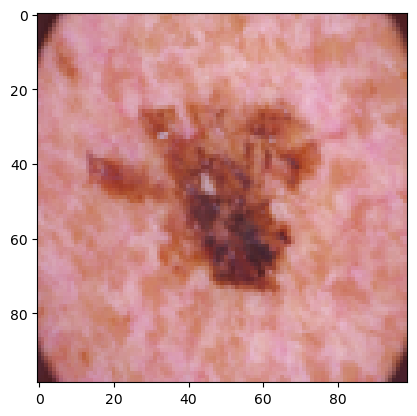

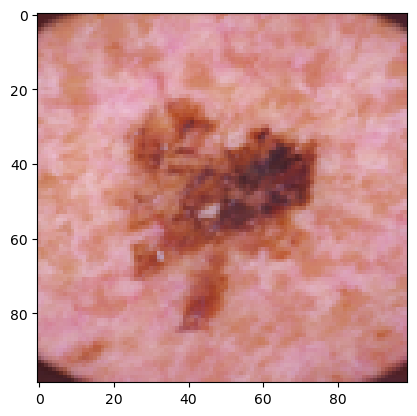

In [184]:
image = Image.open(image_files[0]).convert("RGB")
image = Load_image.resize((99, 99))
nmpy_img = np.asarray(image)
current = df[df['image_id']==image_files[0].split("/")[1][:-4]]
plt.imshow(nmpy_img, interpolation="nearest")
plt.show()
nmpy_img1 = np.rot90(nmpy_img)
plt.imshow(nmpy_img1, interpolation="nearest")
plt.show()
# train_image.append(nmpy_img)
# df2 = df2.append(current, ignore_index=True)

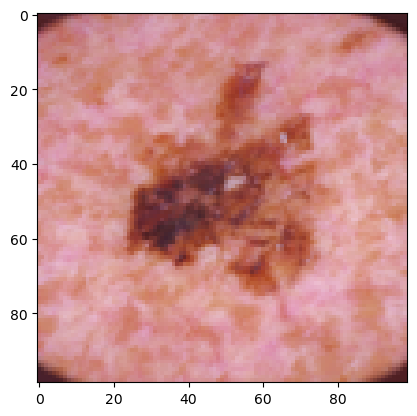

In [192]:
from matplotlib import pyplot as plt

plt.imshow(train_image[7], interpolation="nearest")
plt.show()

In [196]:
np.save("images", np.asarray(train_image))

In [197]:
df2.to_csv("HAM10000_metadata.csv")

In [194]:
df2.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
1,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
2,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
4,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
5,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
6,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
7,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest
8,HAM_0000981,ISIC_0024311,nv,follow_up,75.0,female,back
9,HAM_0001359,ISIC_0024312,bkl,histo,75.0,male,lower extremity
